In [1]:
import pandas as pd
from matplotlib import cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Energy per instruction

## Energy breakdown

### Assembly code
```python
xor rcx, rcx
mov rax, 1
mov rdx, 0

loop:
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    targ_inst(*arg)
    
add rcx, 1
cmp rcx, 9999999
jne loop
```

$E=9999999(\frac{10}{13}inst+\frac{3}{13}loop)$

$E=7692306*inst+2307692*loop$

$E=7692306*inst+constant$

$E_{joules}=RAPL\_ENERGY\_PKG*2.3283064365386962890625e^{-10}$

In [3]:
RAPL_ENERGY_PKG= 2.3283064365386962890625e-10
df = pd.read_csv("general_purpose.csv").sort_values("energy")
df["energy"]*=RAPL_ENERGY_PKG

In [40]:
df["inst"].unique()

array(['XOR', 'NOP', 'CLC', 'SUB', 'CMP', 'TEST', 'MOV', 'STC', 'CMC',
       'BT', 'CQO', 'CDQ', 'MOVSXD', 'BTR', 'MOVZX', 'BTS', 'SHR', 'SHL',
       'SHRD', 'DEC', 'ADC', 'NOT', 'INC', 'CMOVG', 'AND', 'SBB', 'OR',
       'BTC', 'NEG', 'IMUL', 'CWDE', 'SETNP', 'SETC', 'CMOVNG', 'SETG',
       'SETNLE', 'SETE', 'SETNO', 'SETNS', 'CMOVNAE', 'SETGE', 'CMOVAE',
       'SETB', 'SETNL', 'CMOVNE', 'MOVSX', 'SETNZ', 'SETPO', 'SETAE',
       'CMOVPO', 'CMOVNLE', 'CMOVGE', 'CMOVPE', 'CMOVP', 'SAL', 'CMOVNO',
       'SETL', 'CMOVNZ', 'SHLD', 'CMOVB', 'LEA', 'SAR', 'CMOVO', 'SETNGE',
       'CMOVE', 'SETLE', 'CMOVLE', 'CDQE', 'SETS', 'CMOVZ', 'SETO', 'CWD',
       'CBW', 'SETNC', 'SETP', 'SETNG', 'CMOVNC', 'CMOVNGE', 'CMOVL',
       'SETPE', 'CMOVNL', 'CMOVNP', 'CMOVC', 'CMOVS', 'CMOVNB', 'SETZ',
       'SETNB', 'SETNAE', 'CMOVNS', 'SETNE', 'MOVNTI', 'ROR', 'ROL',
       'SETBE', 'SETA', 'SETNBE', 'SETNA', 'ADD', 'CMOVNA', 'CMOVA',
       'CMOVNBE', 'CMOVBE', 'BSWAP', 'XADD', 'BSR', 'BSF', 'CLD'

Text(0.5, 1.0, 'Energy per argument')

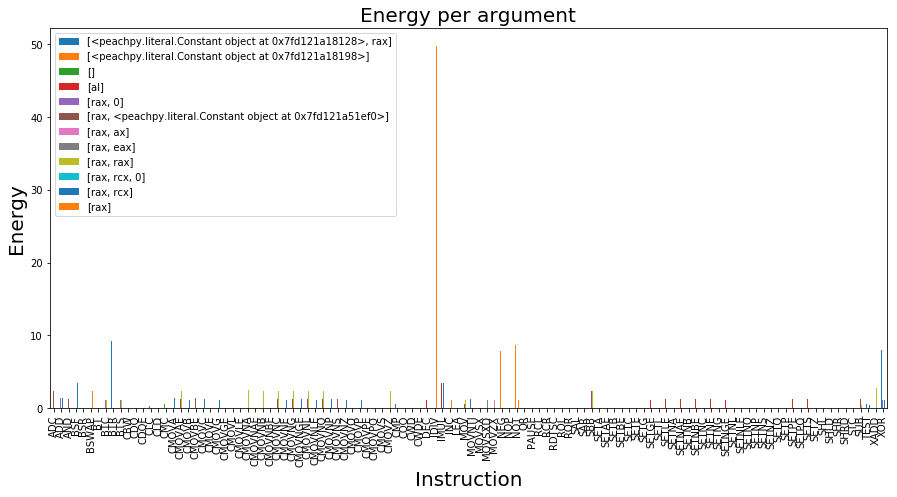

In [33]:
pd.crosstab(df["inst"],df["args"],df["energy"],aggfunc=max).plot.bar(figsize=(15,7))
legend(fontsize=10)
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy per argument",fontsize=20)

Text(0.5, 1.0, 'Energy consumption')

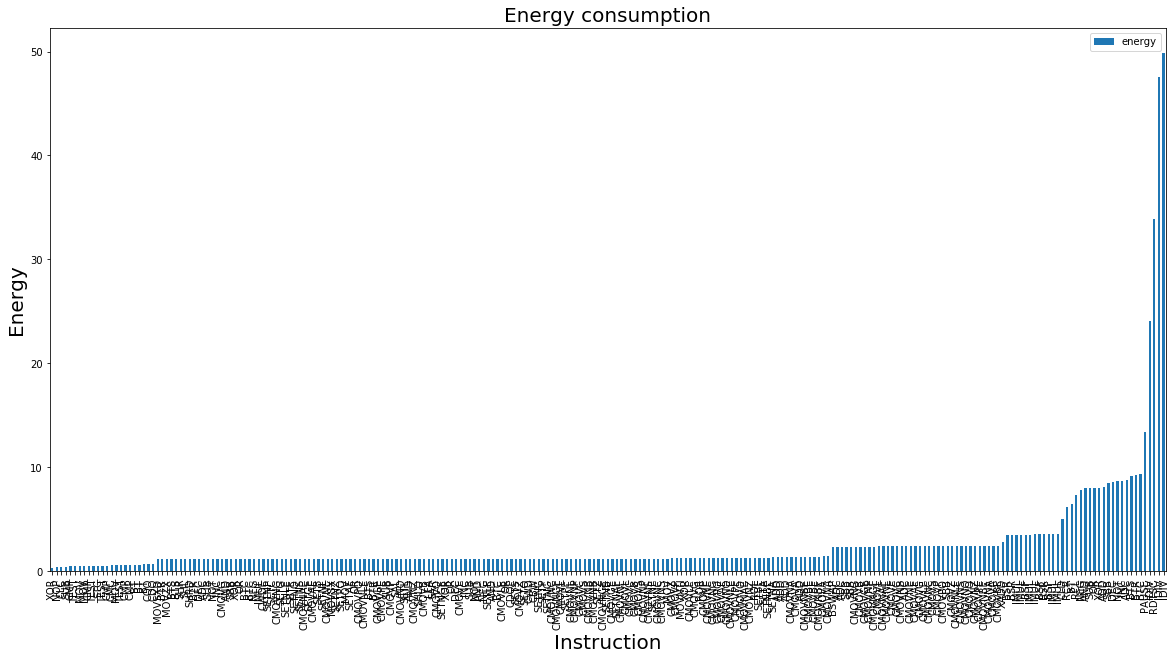

In [34]:
df.sort_values("energy").plot.bar(x="inst",y="energy", figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy consumption",fontsize=20)

Text(0.5, 1.0, 'Mean energy consumption')

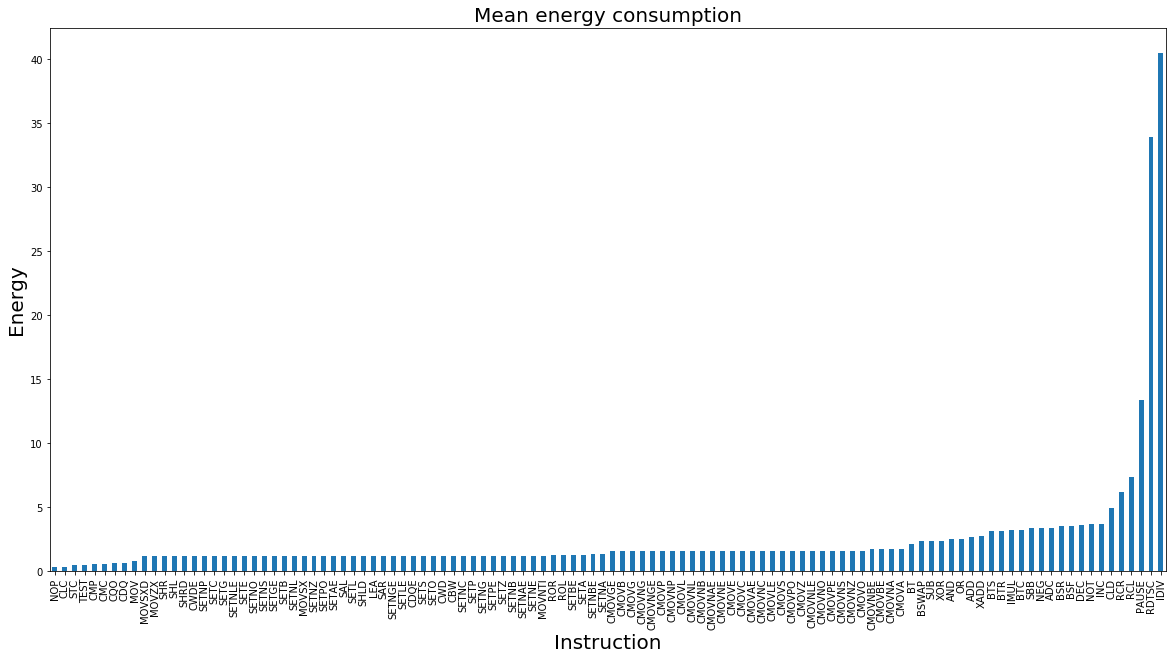

In [35]:
df.groupby("inst").energy.mean().sort_values().plot.bar(figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Mean energy consumption",fontsize=20)

Text(0.5, 1.0, 'Energy deviation')

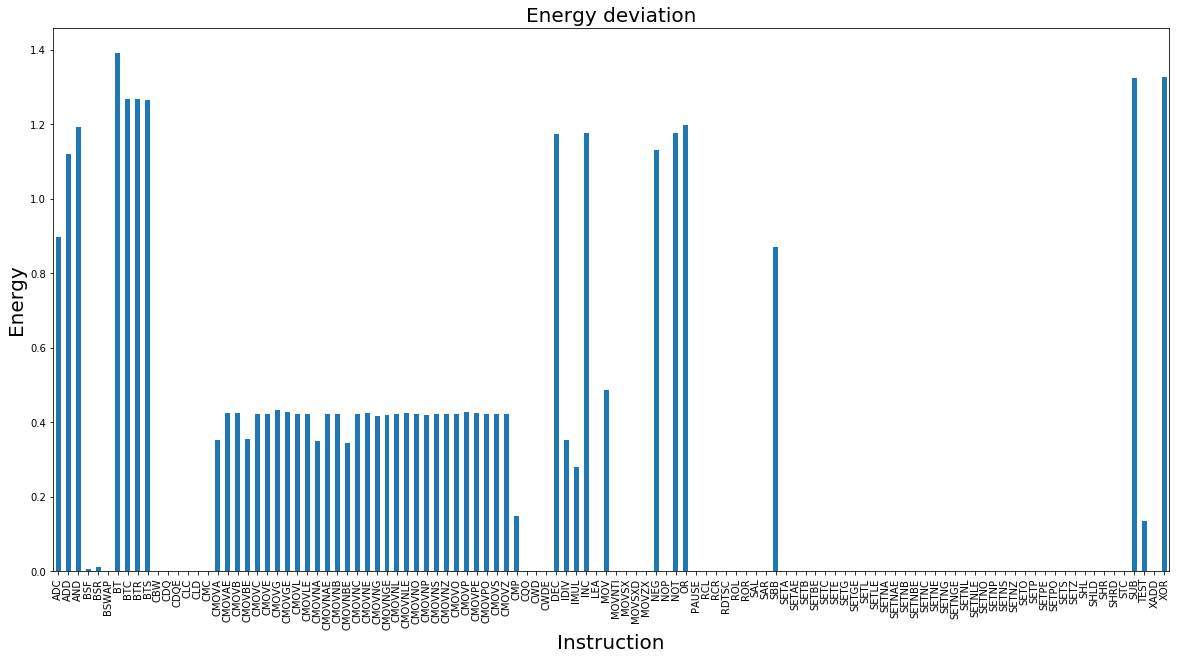

In [36]:
df.groupby("inst").energy.apply(lambda x: x.std()/x.mean()).plot.bar(figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy deviation",fontsize=20)

Text(0.5, 1.0, 'Energy deviation without m64')

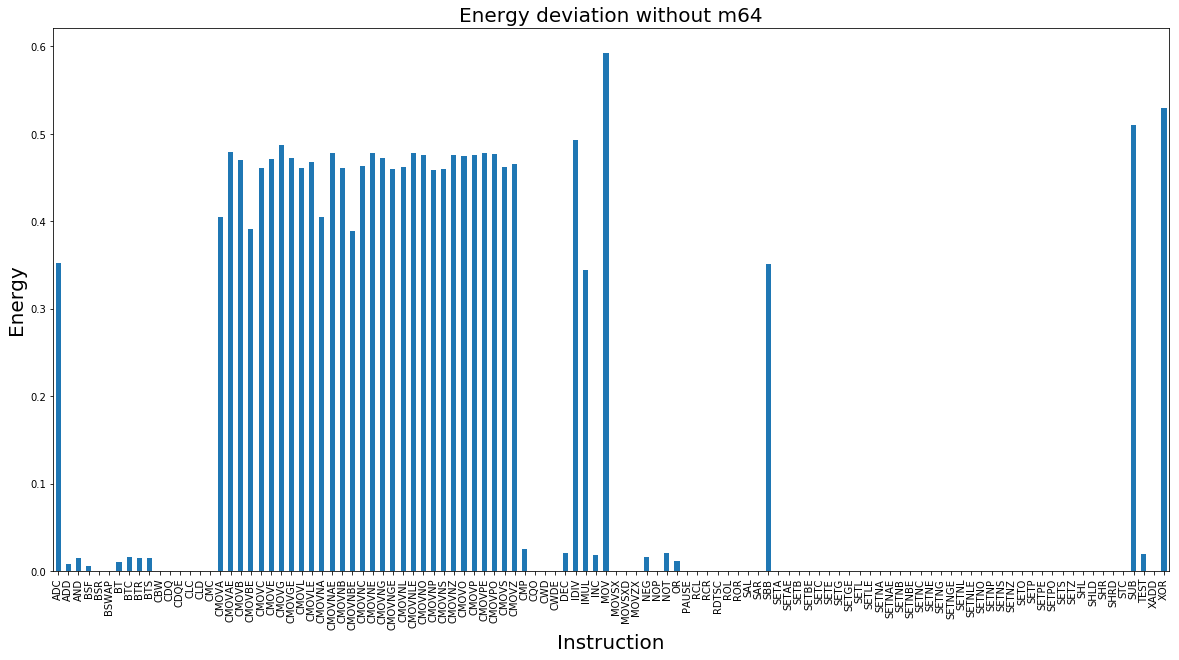

In [37]:
df[~df["args"].str.contains("peach")].groupby("inst").energy.apply(lambda x: x.std()/x.mean()).plot.bar(figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy deviation without m64",fontsize=20)

In [15]:
from sklearn.cluster import KMeans

eneryg_clusters= KMeans(n_clusters=5)
eneryg_clusters.fit(df["energy"].values.reshape(-1,1))
eneryg_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2,
       2], dtype=int32)

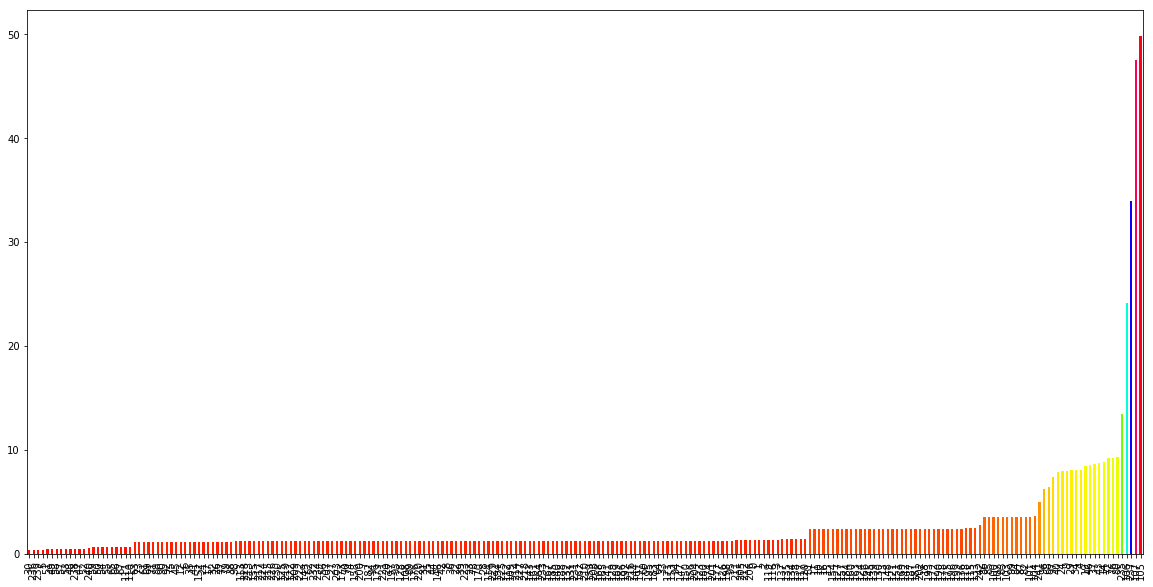

In [81]:
df["energy"].plot.bar(figsize=(20,10),color=cm.hsv(df["energy"]/df["energy"].max()))

array(['PSUBUSB', 'PSUBSB', 'PSUBUSW', 'PCMPGTB', 'XORPS', 'PSUBW',
       'PSUBSW', 'PCMPGTD', 'PSUBD', 'PSUBB', 'XORPD', 'PXOR', 'PSUBQ',
       'PCMPGTW', 'MOVQ', 'MOVDQA', 'MOVDQU', 'MOVSD', 'PSHUFD',
       'PCMPEQB', 'PSHUFHW', 'PCMPEQD', 'PCMPEQW', 'PSHUFLW', 'RCPPS',
       'UCOMISS', 'COMISS', 'CVTDQ2PS', 'RSQRTPS', 'PSRLDQ', 'PAVGB',
       'PMAXUB', 'PMAXSW', 'PMINUB', 'COMISD', 'PAVGW', 'PSRAD', 'PMINSW',
       'PADDUSB', 'PSRLQ', 'PSRAW', 'PADDUSW', 'PADDSW', 'PADDW', 'PSLLW',
       'PADDD', 'UCOMISD', 'PADDSB', 'PADDQ', 'PAND', 'PADDB',
       'PUNPCKHQDQ', 'PUNPCKLBW', 'PACKSSWB', 'PACKUSWB', 'PUNPCKLQDQ',
       'CVTTPS2DQ', 'PUNPCKHDQ', 'PUNPCKHWD', 'POR', 'PUNPCKLWD',
       'PUNPCKLDQ', 'PSRLD', 'PACKSSDW', 'PANDN', 'CVTPS2DQ', 'MOVLPD',
       'MOVHPS', 'MOVLPS', 'MOVHPD', 'PUNPCKHBW', 'PSRLW', 'PSLLQ',
       'PSLLDQ', 'PSLLD', 'MOVD', 'MOVUPD', 'ANDPD', 'MOVAPS', 'ORPD',
       'MOVAPD', 'SHUFPD', 'UNPCKHPD', 'UNPCKLPD', 'MOVLHPS', 'ANDNPD',
       'MOVHLPS', 'M

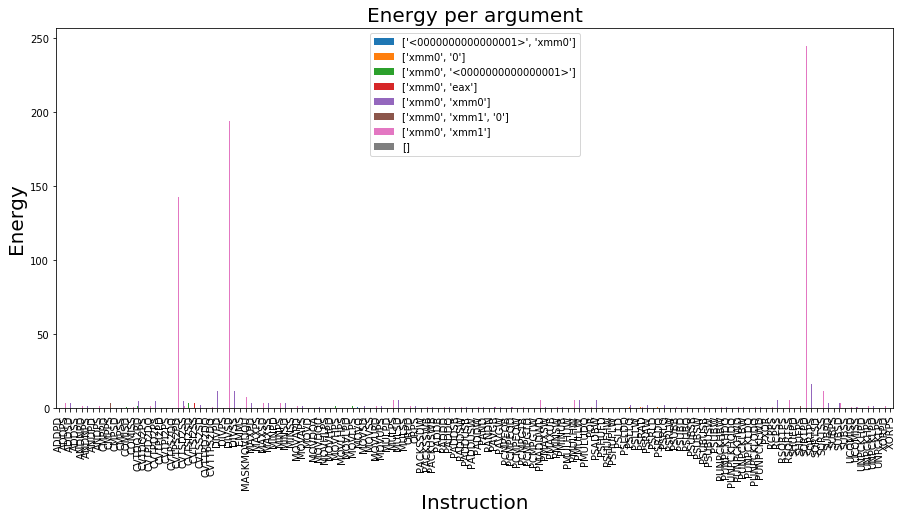

<Figure size 432x288 with 0 Axes>

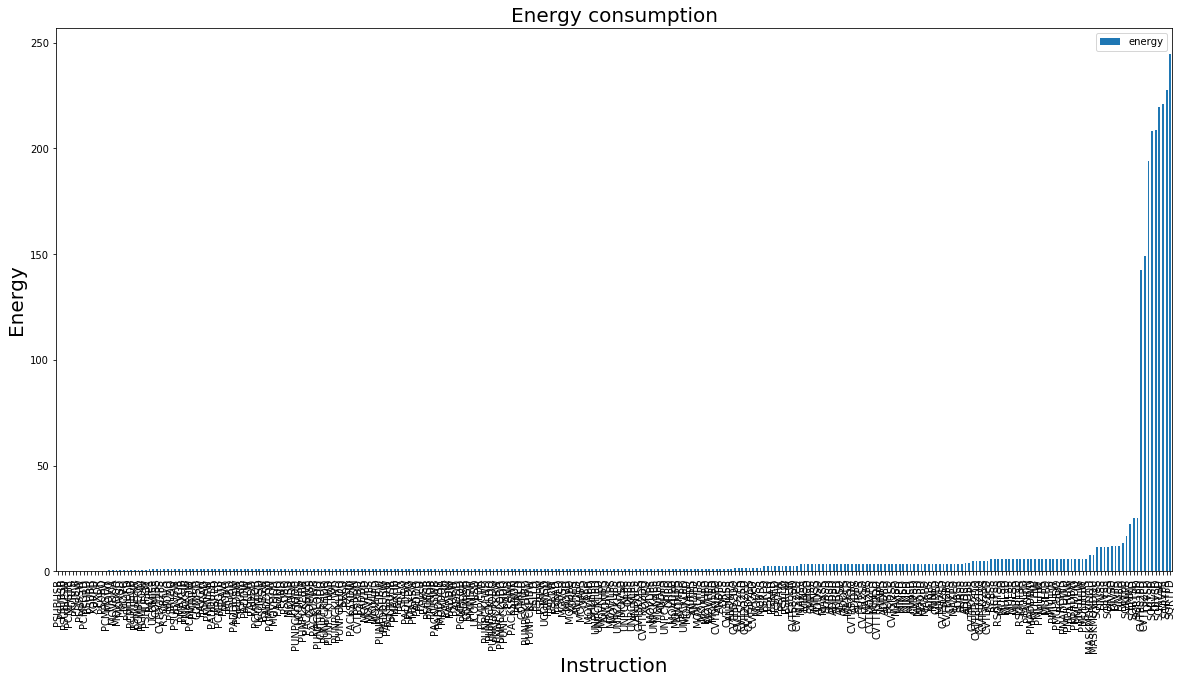

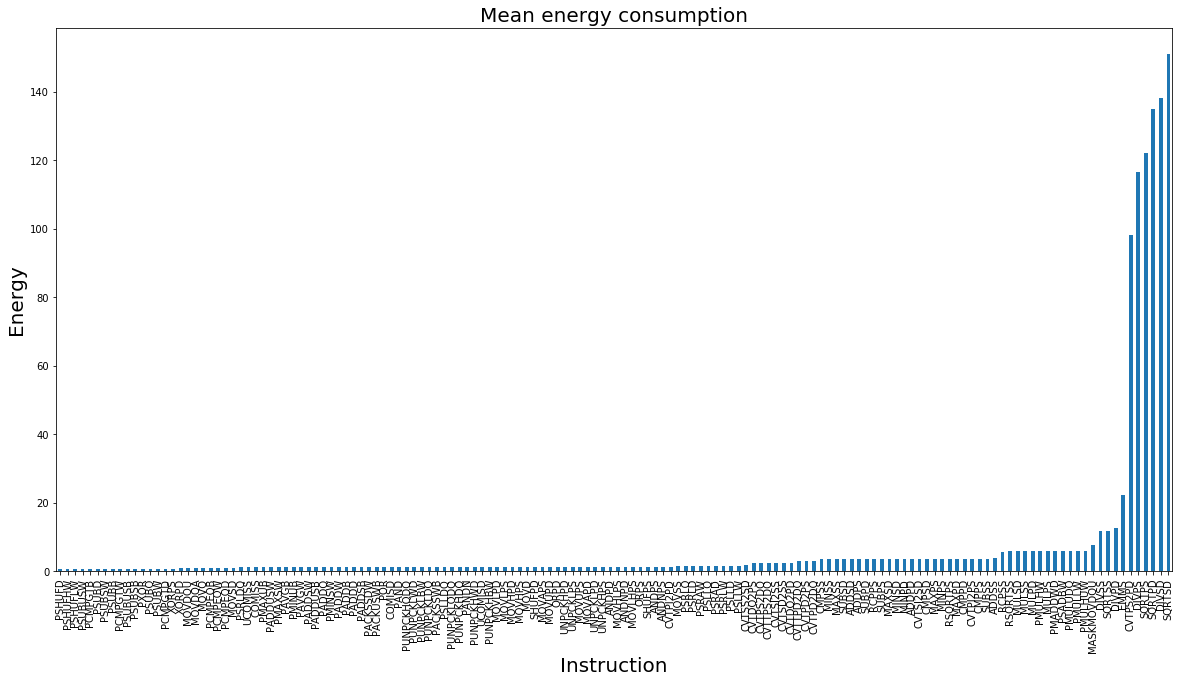

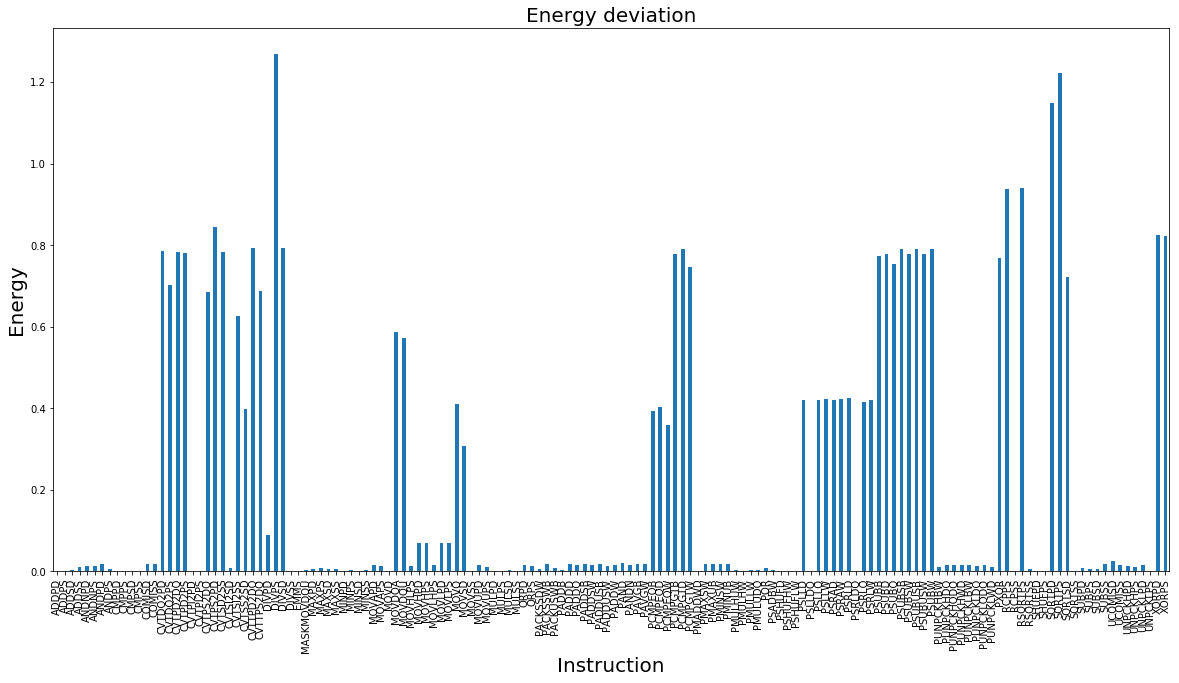

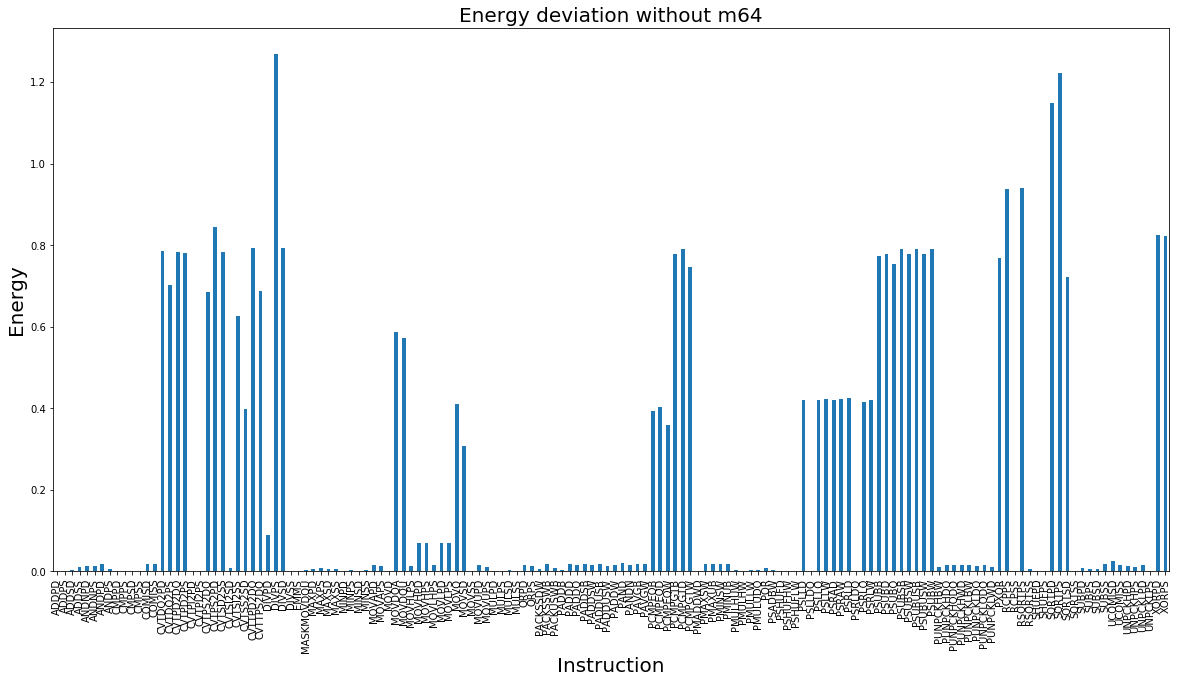

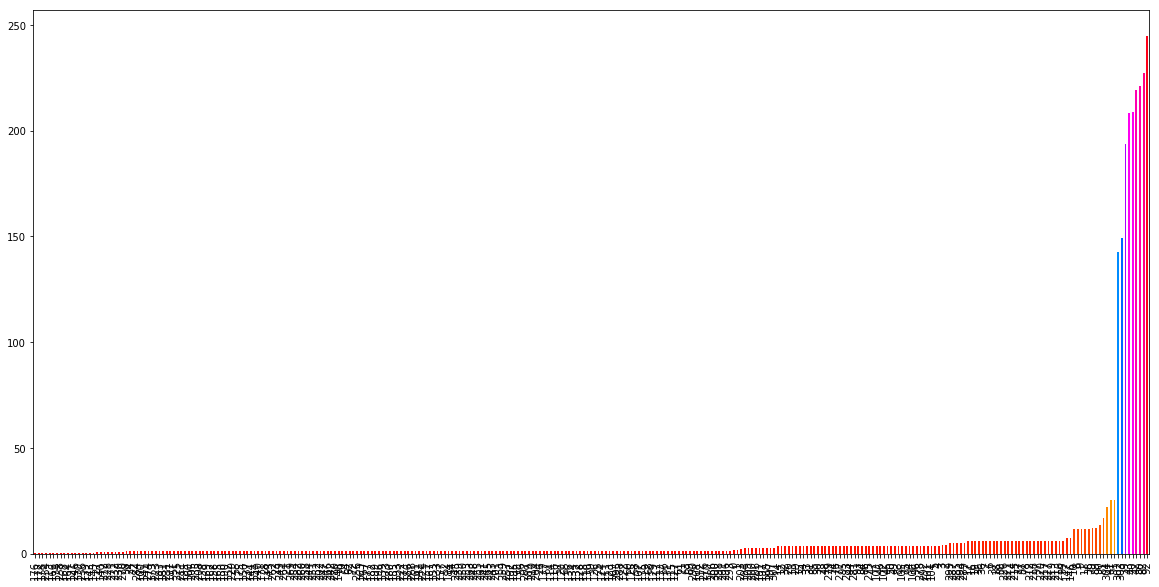

In [17]:
df = pd.read_csv("mmx.csv").sort_values("energy")
df["energy"]*=RAPL_ENERGY_PKG

display(df["inst"].unique())


pd.crosstab(df["inst"],df["args"],df["energy"],aggfunc=max).plot.bar(figsize=(15,7))
legend(fontsize=10)
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy per argument",fontsize=20)
figure()

df.sort_values("energy").plot.bar(x="inst",y="energy", figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy consumption",fontsize=20)
figure()

df.groupby("inst").energy.mean().sort_values().plot.bar(figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Mean energy consumption",fontsize=20)
figure()

df.groupby("inst").energy.apply(lambda x: x.std()/x.mean()).plot.bar(figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy deviation",fontsize=20)
figure()

df[~df["args"].str.contains("peach")].groupby("inst").energy.apply(lambda x: x.std()/x.mean()).plot.bar(figsize=(20,10))
xlabel("Instruction",fontsize=20)
ylabel("Energy",fontsize=20)
title("Energy deviation without m64",fontsize=20)
figure()

df["energy"].plot.bar(figsize=(20,10),color=cm.hsv(df["energy"]/df["energy"].max()))

In [20]:
df.sort_values("energy",ascending=False).head(10)

,inst,args,energy
92,SQRTPD,"['xmm0', 'xmm1']",244.764103
82,SQRTPS,"['xmm0', 'xmm1']",227.461983
80,DIVPS,"['xmm0', 'xmm1']",221.027052
42,SQRTSD,"['xmm0', 'xmm1']",219.436985
40,DIVSD,"['xmm0', '<0000000000000001>']",208.639017
43,SQRTSD,"['xmm0', '<0000000000000001>']",208.434194
39,DIVSD,"['xmm0', 'xmm1']",193.887597
303,CVTPS2PD,"['xmm0', '<0000000000000001>']",149.259784
302,CVTPS2PD,"['xmm0', 'xmm1']",142.483463
91,SQRTPD,"['xmm0', 'xmm0']",25.369153
